In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns',None)


#For Principal Component Analysis- (Dimensionality Reduction)
from sklearn.decomposition import PCA

#For train test split
from sklearn.model_selection import train_test_split

#For Confusion Matrix
from sklearn.metrics import confusion_matrix

#For Classification Report
from sklearn.metrics import classification_report

#Accuracy Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [72]:
dataset = pd.read_csv('lasso_dataset_train.csv')
dataset.head()

,Pclass,Age,SibSp,Cabin,Age_na,Sex_female,Embarked_S,Survived
0,1.0,0.287881,0.125,1.921053,0.0,0.0,1.0,0
1,0.0,0.498879,0.125,1.065789,0.0,1.0,0.0,1
2,1.0,0.340630,0.000,1.921053,0.0,1.0,1.0,1
3,0.0,0.459317,0.125,0.723684,0.0,1.0,1.0,1
4,1.0,0.459317,0.000,1.921053,0.0,0.0,1.0,0


In [73]:
test_dataset = pd.read_csv('processed_test.csv')
test_dataset.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_na,Fare_na,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.177754,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.155738,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.219637,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.197645,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.266392,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [74]:
test_pid = pd.read_csv('test.csv')
test_pid = pd.DataFrame(test_pid['PassengerId'], columns = ['PassengerId'])

In [75]:
test_pid.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


From the test dataset we only have to select the features decided in feature selection.

In [76]:
selected_features = [feature for feature in dataset.columns if feature != 'Survived']
selected_features

['Pclass', 'Age', 'SibSp', 'Cabin', 'Age_na', 'Sex_female', 'Embarked_S']

In [77]:
test_dataset = test_dataset[selected_features]
test_dataset[selected_features].head()

,Pclass,Age,SibSp,Cabin,Age_na,Sex_female,Embarked_S
0,1.0,0.452723,0.000,1.0,0.0,0.0,0.0
1,1.0,0.617566,0.125,1.0,0.0,1.0,1.0
2,0.5,0.815377,0.000,1.0,0.0,0.0,0.0
3,1.0,0.353818,0.000,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,1.0,0.0,1.0,1.0


### Creating train test split

In [78]:
x = dataset.drop('Survived',axis = 1)
y = pd.DataFrame(dataset['Survived'] , columns = ['Survived'])

In [79]:
x.shape , y.shape

((891, 7), (891, 1))

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                       test_size = 0.2 , 
                                                       random_state = 2020)

#### Function for Classification Results

In [81]:
def classification_results(pred):
    print("------Confusion Matrix----------")
    cm1 = confusion_matrix(y_test,pred)
    print(cm1)
    
    #Visualization of Confusion Matrix
    sns.heatmap(cm1,cmap="Blues",fmt="d",linewidths=0.1,linecolor='black',
            annot=True).set_title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Real Class')
    
    print("\n")
    #Classification Matrix Reports
    TP = cm1[1,1]
    print("True Positive: ",+TP)
    TN = cm1[0,0]
    print("True Negative: ",+TN)
    FP = cm1[0,1]
    print("False Positive: ",+FP)
    FN = cm1[1,0]
    print("False Negative: ",+FN)
    print("\n")
    print("Accuracy Rate: ",+((TP+TN)/(TN+FP+FN+TP))*100)
    print("Error Rate: ",+((FP+FN)/(TN+TP+FN+FP))*100)
    print("\n")
    print("-------------------Classification Report----------------- \n")
    print(classification_report(y_test,pred))

#### Function for AUC and ROC

In [82]:
def auc_roc(pred,prob,text):
    roc_auc = roc_auc_score(y_test,pred)
    fpr,tpr , threshold = roc_curve(y_test , prob[:,1])
    
    plt.figure(figsize=(7,5))
    plt.plot(fpr,tpr,label = '(Area = %0.2f)'%  roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(text)
    plt.grid(True)
    plt.legend(loc = 8)
    plt.plot([0,1],[0,1],'r--')

#### Function for Precision Recall Curve

In [83]:
#Function for Precision Recall Curve
def precision_recall(pred , prob1,text):
    prob = prob1[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, prob)
    f1, m_auc = f1_score(y_test, pred), auc(recall, precision)
    print(text,' : f1=%.3f auc=%.3f' % (f1, m_auc))
    
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.grid(True)
    plt.show()

## Naive Bayes Classifier

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb_classifier = GaussianNB().fit(x_train,y_train)

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
y_pred = nb_classifier.predict(x_test)
y_prob = nb_classifier.predict_proba(x_test)

------Confusion Matrix----------
[[79 26]
 [26 48]]


True Positive:  48
True Negative:  79
False Positive:  26
False Negative:  26


Accuracy Rate:  70.94972067039106
Error Rate:  29.05027932960894


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       105
           1       0.65      0.65      0.65        74

    accuracy                           0.71       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.71      0.71       179



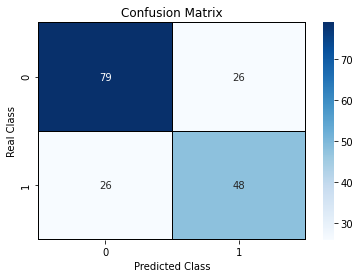

In [87]:
classification_results(y_pred)

Naive Bayes  : f1=0.649 auc=0.669


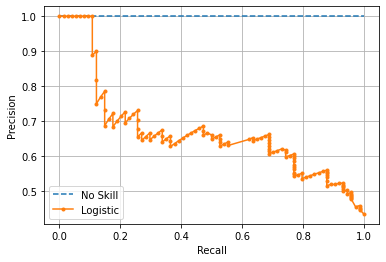

In [88]:
precision_recall(y_pred,y_prob,"Naive Bayes")

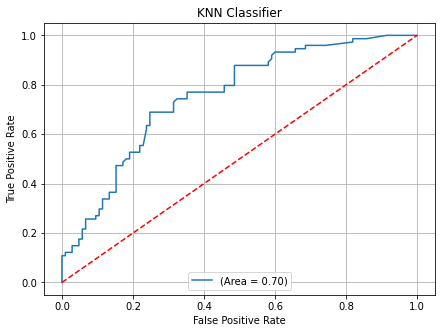

In [89]:
auc_roc(y_pred,y_prob,"KNN Classifier")

**Predicting Actual Values from the test dataset**

In [90]:
output_results = nb_classifier.predict(test_dataset)

In [91]:
output_results

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [92]:
final_results = pd.DataFrame()
final_results['PassengerId'] = test_pid['PassengerId'] 
final_results['Survived'] = output_results

In [93]:
final_results

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [94]:
final_results.to_csv('upload_output.csv', index = False )